In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from random import choice
import re # For cleaning strings into pure numbers
from math import floor
pd.set_option('display.max_columns', None)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder  ## Better in some cases than get_dummies
from sklearn.preprocessing import PowerTransformer

#Cool things and stuff
from sklearn.feature_selection import RFE 

In [2]:
df=pd.read_csv("data_cleaned_2021.csv").drop("index",axis=1)

In [3]:
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Data Architect / Data Modeler,$63K-$110K (Glassdoor est.),Medidata: Conquering Diseases Together\n\nMedi...,4.3,Medidata Solutions\n4.3,"New York, NY","New York, NY",1001 - 5000,1999,Company - Public,Enterprise Software & Network Solutions,Information Technology,$500 million to $1 billion (USD),Oracle,0,0,63,110,86.5,Medidata Solutions,NY,22,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,data modeler,na,M
463,Data Scientist,$65K-$113K (Glassdoor est.),DatamanUSA has an exciting opportunity for a D...,3.4,"DatamanUSA, LLC\n3.4","Olympia, WA","Centennial, CO",51 - 200,-1,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,0,0,65,113,89.0,"DatamanUSA, LLC",WA,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
464,"Associate Scientist / Sr. Associate Scientist,...",$59K-$125K (Glassdoor est.),"Who we are\n\n23andMe, the leading consumer ge...",4.0,23andMe\n4.0,"South San Francisco, CA","Sunnyvale, CA",501 - 1000,2006,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,"Ancestry, Verily Life Sciences, Abbott Laborat...",0,0,59,125,92.0,23andMe,CA,15,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,M
465,Machine Learning Engineer (NLP),$80K-$142K (Glassdoor est.),CK-12’s mission is to provide free access to o...,4.1,CK-12 Foundation\n4.1,"Palo Alto, CA","Palo Alto, CA",1 - 50,2007,Company - Private,K-12 Education,Education,Unknown / Non-Applicable,-1,0,0,80,142,111.0,CK-12 Foundation,CA,14,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,machine learning engineer,na,na


In [4]:
for i in df.columns:
    print(i)

Job Title
Salary Estimate
Job Description
Rating
Company Name
Location
Headquarters
Size
Founded
Type of ownership
Industry
Sector
Revenue
Competitors
Hourly
Employer provided
Lower Salary
Upper Salary
Avg Salary(K)
company_txt
Job Location
Age
Python
spark
aws
excel
sql
sas
keras
pytorch
scikit
tensor
hadoop
tableau
bi
flink
mongo
google_an
job_title_sim
seniority_by_title
Degree


### Making columns lower and with _

In [5]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")

###### We have here plotted the correlations of the different columns. We read from the pairplot, that "Upper Salary", "Lower Salary" and "Average salary" are correlated, which was expected. We therefore choose to drop Upper and Lower salary. Furthermore, "age" and "founded" are correlated as they show the same thing, so we drop age, as founded is better to work with if you don't know when the dataset was created.

As seen below we have also chosen to drop a long list of other columns. This is for some of them because there were a lot of NaNs or no observations and for other columns simply because they carried the same information as another column - an example of this is "company_name" and "company_txt"

In [6]:
list_to_drop=["lower_salary","upper_salary","age","sector","competitors",
              "hourly","employer_provided","location","company_name","sas",
              "keras","pytorch","scikit","tensor","bi","flink","mongo","google_an","seniority_by_title"]

df=df.drop(list_to_drop,axis=1)

In [7]:
df

,job_title,salary_estimate,job_description,rating,headquarters,size,founded,type_of_ownership,industry,revenue,avg_salary(k),company_txt,job_location,python,spark,aws,excel,sql,hadoop,tableau,job_title_sim,degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,"Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,$50 to $100 million (USD),72.0,Tecolote Research,NM,1,0,0,1,0,0,1,data scientist,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,"Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),87.5,University of Maryland Medical System,MD,1,0,0,0,0,0,0,data scientist,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,"Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,$100 to $500 million (USD),85.0,KnowBe4,FL,1,1,0,1,1,0,0,data scientist,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,"Richland, WA",1001 - 5000,1965,Government,Energy,$500 million to $1 billion (USD),76.5,PNNL,WA,1,0,0,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,"New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,114.5,Affinity Solutions,NY,1,0,0,1,1,0,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Data Architect / Data Modeler,$63K-$110K (Glassdoor est.),Medidata: Conquering Diseases Together\n\nMedi...,4.3,"New York, NY",1001 - 5000,1999,Company - Public,Enterprise Software & Network Solutions,$500 million to $1 billion (USD),86.5,Medidata Solutions,NY,0,0,1,1,1,0,0,data modeler,M
463,Data Scientist,$65K-$113K (Glassdoor est.),DatamanUSA has an exciting opportunity for a D...,3.4,"Centennial, CO",51 - 200,-1,Company - Private,IT Services,$5 to $10 million (USD),89.0,"DatamanUSA, LLC",WA,0,0,0,0,0,0,0,data scientist,na
464,"Associate Scientist / Sr. Associate Scientist,...",$59K-$125K (Glassdoor est.),"Who we are\n\n23andMe, the leading consumer ge...",4.0,"Sunnyvale, CA",501 - 1000,2006,Company - Private,Biotech & Pharmaceuticals,Unknown / Non-Applicable,92.0,23andMe,CA,0,0,1,1,0,0,0,other scientist,M
465,Machine Learning Engineer (NLP),$80K-$142K (Glassdoor est.),CK-12’s mission is to provide free access to o...,4.1,"Palo Alto, CA",1 - 50,2007,Company - Private,K-12 Education,Unknown / Non-Applicable,111.0,CK-12 Foundation,CA,1,0,1,1,0,0,0,machine learning engineer,na


In [8]:
def estimates(column):
    column = re.sub(r'[^0-9]', '', column)
    low=""
    high=""
    for i in range(len(column)):
        if i<=len(column)//2-1:
            low=low+column[i]
        else:
            high=high+column[i]
    templist=[int(low),int(high)]
    mean=sum(templist)/len(templist)
    return mean

df["salary_estimate"]=df["salary_estimate"].apply(estimates)

In [18]:
df=df.drop("avg_salary(k)",axis=1)

In [9]:
df.revenue.value_counts()

Unknown / Non-Applicable            134
$10+ billion (USD)                   70
$100 to $500 million (USD)           57
$1 to $2 billion (USD)               39
$500 million to $1 billion (USD)     34
$50 to $100 million (USD)            30
$2 to $5 billion (USD)               26
$25 to $50 million (USD)             22
$10 to $25 million (USD)             21
$5 to $10 million (USD)              13
$5 to $10 billion (USD)              12
$1 to $5 million (USD)                5
Less than $1 million (USD)            4
Name: revenue, dtype: int64

In [10]:
def rev_clean(rev):
    if rev == "Less than $1 million (USD)":
        return 0.5
    elif rev=="$1 to $5 million (USD)":
        return 3
    elif rev=="$5 to $10 million (USD)":
        return 7.5
    elif rev=="$10 to $25 million (USD)":
        return 17.5
    elif rev=="$25 to $50 million (USD)":
        return 37.5
    elif rev=="$50 to $100 million (USD)":
        return 75
    elif rev=="$100 to $500 million (USD)":
        return 300
    elif rev=="$500 million to $1 billion (USD)":
        return 750
    elif rev=="$1 to $2 billion (USD)":
        return 1500
    elif rev=="$2 to $5 billion (USD)":
        return 3000
    elif rev=="$5 to $10 billion (USD)":
        return 7500
    elif rev=="$10+ billion (USD)":
        return 30000
    else:
        return np.random.choice([30000,300,1500,750],p=[0.35,0.28,0.20,0.17]) #The NaNs get assigned to the the most observed revenues.
    
df["revenue"]=df["revenue"].apply(rev_clean)    


### Right here is one of the bummers and therefore learning points

We spent a lot of time simplyfying the job titles, as there were 264 different ones. Just after feeling the satisfaciton of the function working, we notice there was already a column with simplyfied job titles. Waste of time but we learned from it. Look thoroughly through the columns..

In [11]:
def job_clean(job):
    if "scientist" in job.lower() or "science" in job.lower():
        return "Data Scientist"
    elif "analyst" in job.lower() or "analytics" in job.lower():
        return "Data Analyst"
    elif "engineer" in job.lower() or "architect" in job.lower():
        return "Data Engineer"
    elif "manage" in job.lower() or "operations" in job.lower() or "direct" in job.lower() or "opportunit" in job.lower():
        return "Data Manager"
    elif "model" in job.lower():
        return "Data Modeler"
    else:
        return job

df["job_title"]=df["job_title"].apply(job_clean)

df=df.drop("job_title",axis=1)



In [12]:
def mini_size_func(size):
    if size=="unknown":
        return 3000.5 #The most frequent value. Only 6 unknowns, so won't mess much with the model.
    elif size=="10000+":
        return 10000
    else:
        return estimates(size)


df["size"]=df["size"].apply(mini_size_func)

df=df.rename(columns={"size":"estimated_size"})
df

,salary_estimate,job_description,rating,headquarters,estimated_size,founded,type_of_ownership,industry,revenue,avg_salary(k),company_txt,job_location,python,spark,aws,excel,sql,hadoop,tableau,job_title_sim,degree
0,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,"Goleta, CA",750.5,1973,Company - Private,Aerospace & Defense,75.0,72.0,Tecolote Research,NM,1,0,0,1,0,0,1,data scientist,M
1,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,"Baltimore, MD",5.0,1984,Other Organization,Health Care Services & Hospitals,3000.0,87.5,University of Maryland Medical System,MD,1,0,0,0,0,0,0,data scientist,M
2,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,"Clearwater, FL",750.5,2010,Company - Private,Security Services,300.0,85.0,KnowBe4,FL,1,1,0,1,1,0,0,data scientist,M
3,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,"Richland, WA",3000.5,1965,Government,Energy,750.0,76.5,PNNL,WA,1,0,0,0,0,0,0,data scientist,na
4,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,"New York, NY",125.5,1998,Company - Private,Advertising & Marketing,30000.0,114.5,Affinity Solutions,NY,1,0,0,1,1,0,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,86.5,Medidata: Conquering Diseases Together\n\nMedi...,4.3,"New York, NY",3000.5,1999,Company - Public,Enterprise Software & Network Solutions,750.0,86.5,Medidata Solutions,NY,0,0,1,1,1,0,0,data modeler,M
463,89.0,DatamanUSA has an exciting opportunity for a D...,3.4,"Centennial, CO",125.5,-1,Company - Private,IT Services,7.5,89.0,"DatamanUSA, LLC",WA,0,0,0,0,0,0,0,data scientist,na
464,92.0,"Who we are\n\n23andMe, the leading consumer ge...",4.0,"Sunnyvale, CA",750.5,2006,Company - Private,Biotech & Pharmaceuticals,300.0,92.0,23andMe,CA,0,0,1,1,0,0,0,other scientist,M
465,111.0,CK-12’s mission is to provide free access to o...,4.1,"Palo Alto, CA",25.5,2007,Company - Private,K-12 Education,1500.0,111.0,CK-12 Foundation,CA,1,0,1,1,0,0,0,machine learning engineer,na


In [13]:
def clean_headq(city):
    if city=="-1":
        return np.random.choice(["CA","MA","NY","VA"],1,p=[0.45,0.21,0.18,0.16])[0] #Choose randomly between one of the 4 most frequent cities.
    else:
        in_of_comma=city.index(",")
        from_i=in_of_comma+2
        end_i=len(city)
        return city[from_i:end_i]
    
df["headquarters"]=df["headquarters"].apply(clean_headq)
    
    

In [14]:
def statebin(binny):
    if "CT" in binny or "ME"in binny or "MA"in binny or "NH"in binny or "RI" in binny or "VY"in binny:
        return "Boston Region"
    elif "NY"in binny or "NJ"in binny or "PR"in binny or "VI"in binny:
        return "New York Region"
    elif "DE"in binny or "DC"in binny or "MD"in binny or "VA"in binny or "PA" in binny:
        return "Philadelphia Region"
    elif "AL"in binny or "FL"in binny or "GA" in binny or "KY"in binny or "MS"in binny or "NC"in binny or "SC"in binny or "TN"in binny:
        return "Atlanta Region"
    elif "IL"in binny or "IN"in binny or "MI"in binny or "MN"in binny or "OH"in binny or "WI"in binny:
        return "Chicago Region"
    elif "AR"in binny or "LA" in binny or "NM"in binny or "OK"in binny or "TX"in binny:
        return "Dallas Region"
    elif "IA"in binny or "KS"in binny or "MO"in binny or "NE"in binny:
        return "Kansas City Region"
    elif "CO"in binny or "MT"in binny or "ND" in binny or "SD"in binny or "UT" in binny or "WY"in binny:
        return "Denver Region"
    elif "AZ"in binny or "CA"in binny or "HI"in binny or "NV" in binny:
        return "San Francisco Region"
    elif "AK"in binny or "ID"in binny or "OR" in binny or "WA"in binny:
        return "Seattle Region"
    elif "United Kingdom"in binny:
        return "United Kingdom"
    elif "Switzerland"in binny:
        return "Switzerland"
    elif "Japan"in binny:
        return "Japan"
    else:
        return "Other"

In [15]:
df["headquarters"]=df["headquarters"].apply(statebin)

In [16]:
df["job_location"]=df["job_location"].apply(statebin)

In [20]:
def founded_mean(y):
    mean_y=(sum(df.founded)+33)/(len(df.founded)-33) #Taking care of the 33 -1.
    if y==-1:
        return mean_y
    else:
        return y

df["founded"]=df["founded"].apply(founded_mean)

In [21]:
def indclean(indy):
    if "insurance" in indy.lower() or "broker"in indy.lower() or "financ"in indy.lower() or "bank"in indy.lower() or "accounting" in indy.lower() or "stock exchange"in indy.lower() or "lending"in indy.lower():
        return "Finance"
    elif "college"in indy.lower() or "school"in indy.lower() or "education" in indy.lower():
        return "Education"
    elif "retail" in indy.lower() or "consumer"in indy.lower() or "store"in indy.lower() or "wholesale"in indy.lower() or "galler"in indy.lower():
        return "Retail"
    elif "health"in indy.lower():
        return "Healthcare"
    elif "internet"in indy.lower() or "software"in indy.lower() or "telecommunication"in indy.lower() or "it services" in indy.lower():
        return "IT Services"
    elif "motion picture" in indy.lower() or "tv broadcast" in indy.lower() or "gambling" in indy.lower() or "video" in indy.lower():
        return "Entertainment"
    elif "transport"in indy.lower() or "logistics"in indy.lower() or "travel"in indy.lower() or "gas station"in indy.lower() or "truck"in indy.lower():
        return "Transport and Logistics"
    elif "cosmetic" in indy.lower() or "farm"in indy.lower() or "mining"in indy.lower() or "construction"in indy.lower() or "mining" in indy.lower() or "food"in indy.lower():
        return "Other"
    else:
        return indy

df["industry"]=df["industry"].apply(indclean)

In [22]:
def ownership_clean(ownership):
    if "college" in ownership.lower() or "school" in ownership.lower():
        return "Education"
    else:
        return ownership

df["type_of_ownership"]=df["type_of_ownership"].apply(ownership_clean)

<AxesSubplot:>

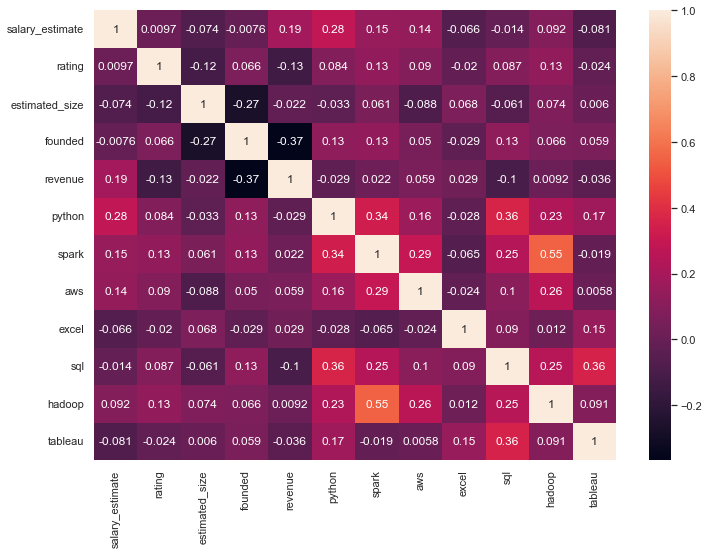

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(),annot=True)

# Start of modeling

In [24]:
#Split into numericals and categoricals
num_df=df.select_dtypes(include="number")
cat_df=df.select_dtypes(include="object")

# Model 1 - only with numericals

In [25]:
#Splitting the data into x and y
x1=num_df.drop("salary_estimate",axis=1)
y1=num_df["salary_estimate"]

array([[<AxesSubplot:title={'center':'salary_estimate'}>,
        <AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'estimated_size'}>],
       [<AxesSubplot:title={'center':'founded'}>,
        <AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'python'}>],
       [<AxesSubplot:title={'center':'spark'}>,
        <AxesSubplot:title={'center':'aws'}>,
        <AxesSubplot:title={'center':'excel'}>],
       [<AxesSubplot:title={'center':'sql'}>,
        <AxesSubplot:title={'center':'hadoop'}>,
        <AxesSubplot:title={'center':'tableau'}>]], dtype=object)

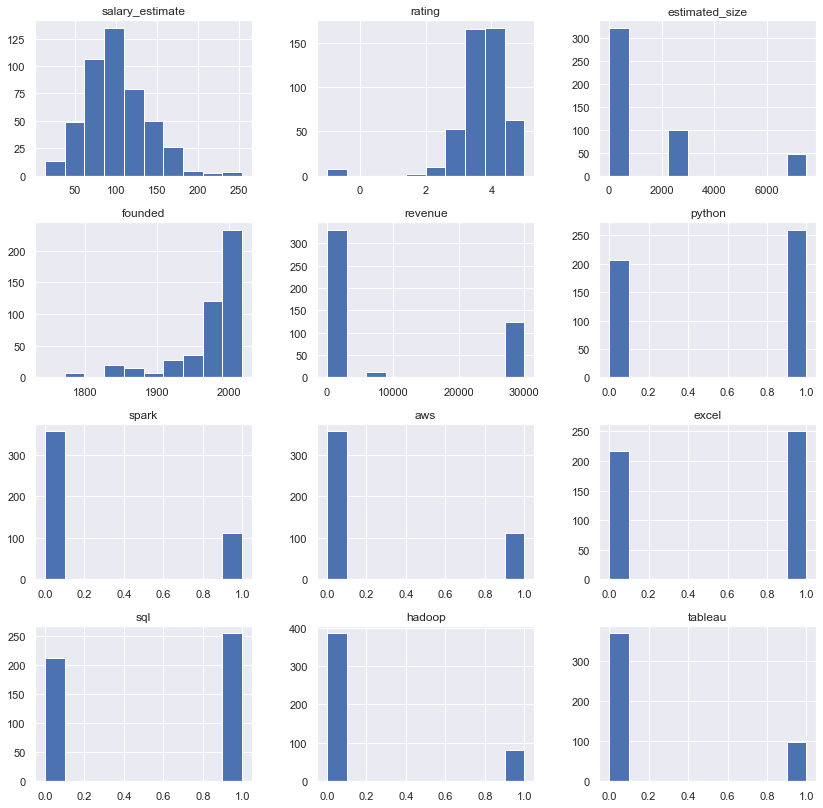

In [26]:
num_df.hist(figsize=(14,14))

In [27]:
#Splitting it more into train and test sets
X_train1, X_test1, y_train1, y_test1=train_test_split(x1, y1, test_size=.30,random_state=123)

In [31]:
std_scaler=StandardScaler().fit(X_train1) ## finding the parameters (mean, variance from the training set)

X_train_scaled1=std_scaler.transform(X_train1)
X_test_scaled1=std_scaler.transform(X_test1)

In [32]:
print(X_train_scaled1)
print("________________________\n")
print(X_test_scaled1)

[[-0.4270605  -0.69992448 -1.16624424 ... -1.14545045 -0.45050198
  -0.50861307]
 [ 0.56296064 -0.37153313  0.72230041 ... -1.14545045 -0.45050198
  -0.50861307]
 [ 0.68671328 -0.69992448  0.01114985 ... -1.14545045 -0.45050198
  -0.50861307]
 ...
 [ 0.93421857 -0.54773238  0.62393871 ... -1.14545045 -0.45050198
  -0.50861307]
 [ 0.31545535 -0.69992448 -1.1465719  ... -1.14545045 -0.45050198
  -0.50861307]
 [ 0.19170271 -0.69992448 -0.08426554 ...  0.87301899  2.2197461
  -0.50861307]]
________________________

[[ 0.19170271 -0.37153313  0.25016425 ...  0.87301899  2.2197461
   1.96613114]
 [-0.30330786 -0.69992448  0.13213021 ...  0.87301899 -0.45050198
  -0.50861307]
 [-0.17955521 -0.54773238  0.36819829 ... -1.14545045 -0.45050198
  -0.50861307]
 ...
 [ 0.31545535 -0.54773238  0.70262807 ...  0.87301899 -0.45050198
  -0.50861307]
 [ 1.30547649 -0.64684446  0.48623233 ... -1.14545045 -0.45050198
  -0.50861307]
 [ 1.42922913 -0.69089427  0.78131743 ...  0.87301899 -0.45050198
   1.966

In [34]:
X_train_const_scaled1 = sm.add_constant(X_train_scaled1)

model1 = sm.OLS(y_train1, X_train_const_scaled1).fit()

X_test_const_scaled1 = sm.add_constant(X_test_scaled1) # adding a constant

print_model1 = model1.summary()
print(print_model1)

                            OLS Regression Results                            
Dep. Variable:        salary_estimate   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     5.843
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.25e-08
Time:                        10:25:43   Log-Likelihood:                -1608.5
No. Observations:                 326   AIC:                             3241.
Df Residuals:                     314   BIC:                             3286.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.6074      1.897     53.027      0.0

In [36]:
cat_df=cat_df.drop(["job_description","company_txt"],axis=1)

In [37]:
cat_df

,headquarters,type_of_ownership,industry,job_location,job_title_sim,degree
0,San Francisco Region,Company - Private,Aerospace & Defense,Dallas Region,data scientist,M
1,Philadelphia Region,Other Organization,Healthcare,Philadelphia Region,data scientist,M
2,Atlanta Region,Company - Private,Security Services,Atlanta Region,data scientist,M
3,Seattle Region,Government,Energy,Seattle Region,data scientist,na
4,New York Region,Company - Private,Advertising & Marketing,New York Region,data scientist,na
...,...,...,...,...,...,...
462,New York Region,Company - Public,IT Services,New York Region,data modeler,M
463,Denver Region,Company - Private,IT Services,Seattle Region,data scientist,na
464,San Francisco Region,Company - Private,Biotech & Pharmaceuticals,San Francisco Region,other scientist,M
465,San Francisco Region,Company - Private,Education,San Francisco Region,machine learning engineer,na


In [38]:
cat_dummy=pd.get_dummies(cat_df,drop_first=True)
cat_dummy

,headquarters_Boston Region,headquarters_Chicago Region,headquarters_Dallas Region,headquarters_Denver Region,headquarters_Japan,headquarters_Kansas City Region,headquarters_New York Region,headquarters_Other,headquarters_Philadelphia Region,headquarters_San Francisco Region,headquarters_Seattle Region,headquarters_Switzerland,headquarters_United Kingdom,type_of_ownership_Company - Public,type_of_ownership_Education,type_of_ownership_Government,type_of_ownership_Hospital,type_of_ownership_Nonprofit Organization,type_of_ownership_Other Organization,type_of_ownership_Subsidiary or Business Segment,industry_Advertising & Marketing,industry_Aerospace & Defense,industry_Architectural & Engineering Services,industry_Biotech & Pharmaceuticals,industry_Consulting,industry_Education,industry_Energy,industry_Entertainment,industry_Federal Agencies,industry_Finance,industry_Healthcare,industry_IT Services,industry_Industrial Manufacturing,industry_Other,industry_Real Estate,industry_Religious Organizations,industry_Research & Development,industry_Retail,industry_Security Services,industry_Social Assistance,industry_Staffing & Outsourcing,industry_Transport and Logistics,job_location_Boston Region,job_location_Chicago Region,job_location_Dallas Region,job_location_Denver Region,job_location_Kansas City Region,job_location_New York Region,job_location_Philadelphia Region,job_location_San Francisco Region,job_location_Seattle Region,job_title_sim_analyst,job_title_sim_data analitics,job_title_sim_data engineer,job_title_sim_data modeler,job_title_sim_data scientist,job_title_sim_director,job_title_sim_machine learning engineer,job_title_sim_na,job_title_sim_other scientist,degree_P,degree_na
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
463,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
464,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
465,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [39]:
num_df

,salary_estimate,rating,estimated_size,founded,revenue,python,spark,aws,excel,sql,hadoop,tableau
0,72.0,3.8,750.5,1973.00000,75.0,1,0,0,1,0,0,1
1,87.5,3.4,5.0,1984.00000,3000.0,1,0,0,0,0,0,0
2,85.0,4.8,750.5,2010.00000,300.0,1,1,0,1,1,0,0
3,76.5,3.8,3000.5,1965.00000,750.0,1,0,0,0,0,0,0
4,114.5,2.9,125.5,1998.00000,30000.0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
462,86.5,4.3,3000.5,1999.00000,750.0,0,0,1,1,1,0,0
463,89.0,3.4,125.5,1971.85023,7.5,0,0,0,0,0,0,0
464,92.0,4.0,750.5,2006.00000,300.0,0,0,1,1,0,0,0
465,111.0,4.1,25.5,2007.00000,1500.0,1,0,1,1,0,0,0


/Users/Clement/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Transformed Ratings Feature')]

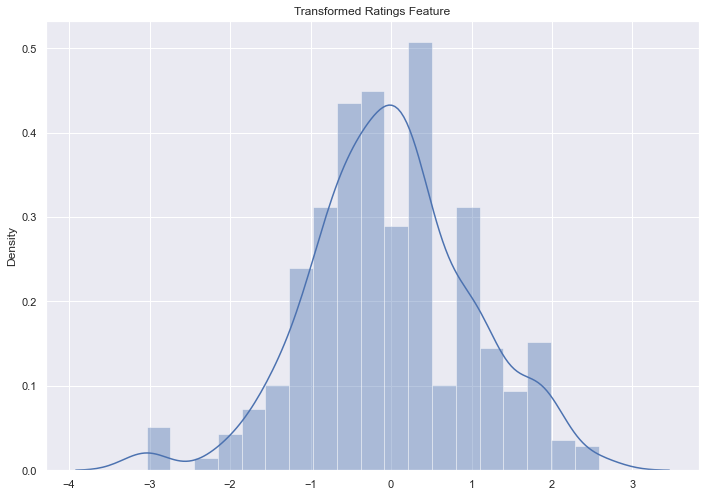

In [40]:
pt = PowerTransformer()
rating_trans=pt.fit_transform(num_df["rating"].to_numpy().reshape(-1,1))
sns.distplot(rating_trans).set(title='Transformed Ratings Feature')

In [41]:
num_df["rating"]= rating_trans

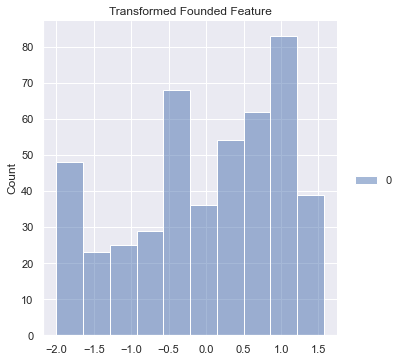

In [42]:
founded_trans=pt.fit_transform(num_df["founded"].to_numpy().reshape(-1,1))
sns.displot(founded_trans).set(title='Transformed Founded Feature')

In [43]:
num_df["founded"]= founded_trans

In [45]:
mmscaler = MinMaxScaler()
rev_array=num_df["revenue"].values.reshape(-1,1)

rev_scaled = mmscaler.fit_transform(rev_array)
num_df["revenue"]=rev_scaled

/Users/Clement/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'MinMax Revenue Feature')]

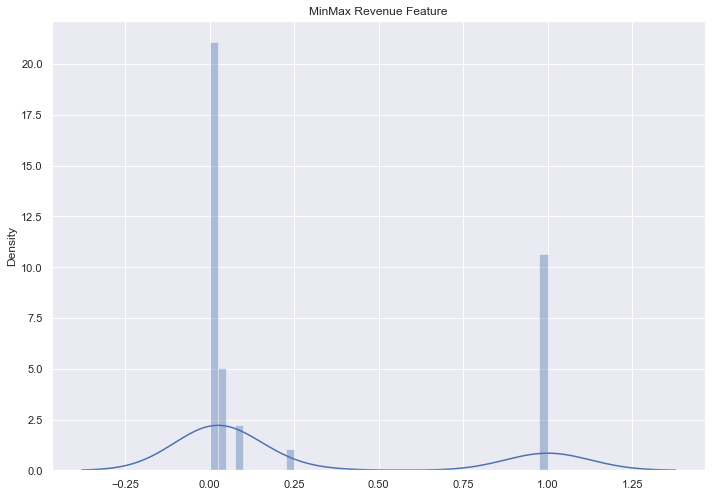

In [46]:
sns.distplot(rev_scaled,bins=40).set(title= 'MinMax Revenue Feature')

In [48]:
size_array=num_df["estimated_size"].values.reshape(-1,1)
size_scaled = mmscaler.fit_transform(size_array)
num_df["estimated_size"]=size_scaled

[Text(0.5, 1.0, 'MinMax Size')]

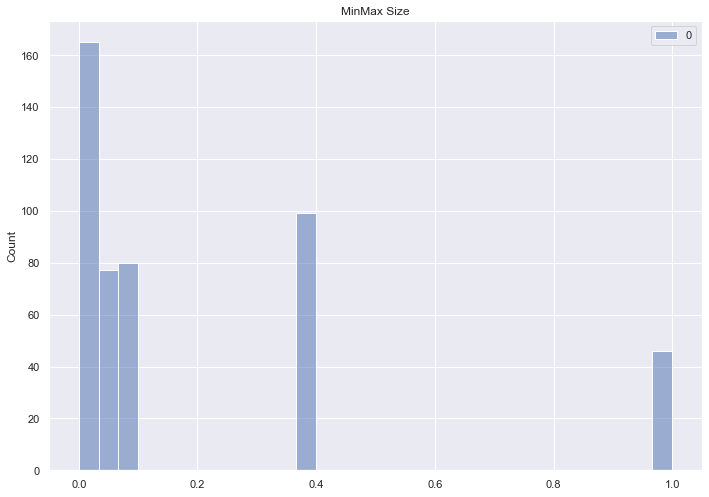

In [50]:
sns.histplot(size_scaled,bins=30).set(title='MinMax Size')

### We can concat both the nums and cats now- though on first instance our data will likely need to be more generally grouped .

In [51]:
main_df=pd.concat([num_df,cat_dummy],axis=1)

In [52]:
main_df

,salary_estimate,rating,estimated_size,founded,revenue,python,spark,aws,excel,sql,hadoop,tableau,headquarters_Boston Region,headquarters_Chicago Region,headquarters_Dallas Region,headquarters_Denver Region,headquarters_Japan,headquarters_Kansas City Region,headquarters_New York Region,headquarters_Other,headquarters_Philadelphia Region,headquarters_San Francisco Region,headquarters_Seattle Region,headquarters_Switzerland,headquarters_United Kingdom,type_of_ownership_Company - Public,type_of_ownership_Education,type_of_ownership_Government,type_of_ownership_Hospital,type_of_ownership_Nonprofit Organization,type_of_ownership_Other Organization,type_of_ownership_Subsidiary or Business Segment,industry_Advertising & Marketing,industry_Aerospace & Defense,industry_Architectural & Engineering Services,industry_Biotech & Pharmaceuticals,industry_Consulting,industry_Education,industry_Energy,industry_Entertainment,industry_Federal Agencies,industry_Finance,industry_Healthcare,industry_IT Services,industry_Industrial Manufacturing,industry_Other,industry_Real Estate,industry_Religious Organizations,industry_Research & Development,industry_Retail,industry_Security Services,industry_Social Assistance,industry_Staffing & Outsourcing,industry_Transport and Logistics,job_location_Boston Region,job_location_Chicago Region,job_location_Dallas Region,job_location_Denver Region,job_location_Kansas City Region,job_location_New York Region,job_location_Philadelphia Region,job_location_San Francisco Region,job_location_Seattle Region,job_title_sim_analyst,job_title_sim_data analitics,job_title_sim_data engineer,job_title_sim_data modeler,job_title_sim_data scientist,job_title_sim_director,job_title_sim_machine learning engineer,job_title_sim_na,job_title_sim_other scientist,degree_P,degree_na
0,72.0,0.083876,0.099460,-0.403755,0.002483,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,87.5,-0.553556,0.000000,-0.060047,0.099985,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,85.0,2.098810,0.099460,1.057475,0.009983,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,76.5,0.083876,0.399640,-0.616275,0.024984,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,114.5,-1.226256,0.016076,0.480895,1.000000,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,86.5,1.013191,0.399640,0.524636,0.024984,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
463,89.0,-0.553556,0.016076,-0.436110,0.000233,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
464,92.0,0.437460,0.099460,0.852269,0.009983,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
465,111.0,0.623245,0.002735,0.902291,0.049984,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [53]:
df["exp"]=df["job_description"].str.findall('\D\d year|\D\d\D year')

In [54]:
df["exp"]

0                                []
1              [ 3+ year,  3+ year]
2                [-3 year, -2 year]
3      [-1 year, -1 year,  5+ year]
4                                []
                   ...             
462                              []
463                              []
464              [ 5 year,  3 year]
465           [ 3+ year, \n3+ year]
466                     [\n1+ year]
Name: exp, Length: 467, dtype: object

In [55]:
def cleanxp(xp):
    if xp==[]:
        return 0
    else:
        for i in range(len(xp)):
            xp[i]=re.sub(r'[^0-9]', '',xp[i])
            maxi=max(xp)
            return int(maxi)

In [56]:
main_df["exp"]=df["exp"].apply(cleanxp)

In [57]:
main_df

,salary_estimate,rating,estimated_size,founded,revenue,python,spark,aws,excel,sql,hadoop,tableau,headquarters_Boston Region,headquarters_Chicago Region,headquarters_Dallas Region,headquarters_Denver Region,headquarters_Japan,headquarters_Kansas City Region,headquarters_New York Region,headquarters_Other,headquarters_Philadelphia Region,headquarters_San Francisco Region,headquarters_Seattle Region,headquarters_Switzerland,headquarters_United Kingdom,type_of_ownership_Company - Public,type_of_ownership_Education,type_of_ownership_Government,type_of_ownership_Hospital,type_of_ownership_Nonprofit Organization,type_of_ownership_Other Organization,type_of_ownership_Subsidiary or Business Segment,industry_Advertising & Marketing,industry_Aerospace & Defense,industry_Architectural & Engineering Services,industry_Biotech & Pharmaceuticals,industry_Consulting,industry_Education,industry_Energy,industry_Entertainment,industry_Federal Agencies,industry_Finance,industry_Healthcare,industry_IT Services,industry_Industrial Manufacturing,industry_Other,industry_Real Estate,industry_Religious Organizations,industry_Research & Development,industry_Retail,industry_Security Services,industry_Social Assistance,industry_Staffing & Outsourcing,industry_Transport and Logistics,job_location_Boston Region,job_location_Chicago Region,job_location_Dallas Region,job_location_Denver Region,job_location_Kansas City Region,job_location_New York Region,job_location_Philadelphia Region,job_location_San Francisco Region,job_location_Seattle Region,job_title_sim_analyst,job_title_sim_data analitics,job_title_sim_data engineer,job_title_sim_data modeler,job_title_sim_data scientist,job_title_sim_director,job_title_sim_machine learning engineer,job_title_sim_na,job_title_sim_other scientist,degree_P,degree_na,exp
0,72.0,0.083876,0.099460,-0.403755,0.002483,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,87.5,-0.553556,0.000000,-0.060047,0.099985,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3
2,85.0,2.098810,0.099460,1.057475,0.009983,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3
3,76.5,0.083876,0.399640,-0.616275,0.024984,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1
4,114.5,-1.226256,0.016076,0.480895,1.000000,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,86.5,1.013191,0.399640,0.524636,0.024984,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
463,89.0,-0.553556,0.016076,-0.436110,0.000233,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
464,92.0,0.437460,0.099460,0.852269,0.009983,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5
465,111.0,0.623245,0.002735,0.902291,0.049984,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,3


### Setting years of experience together with salary

1) Make a dictionary with all the years as keys and empty lists for values, to which we will addd the corresponding salary.

2) Then we iterate through the exp column and add the salaries to the lists in dict.

3) Sort each list in dict

4) Get median salary

In [58]:
num_dict={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}

In [60]:
for i,val in enumerate(main_df["exp"]):
    if val==0:
        num_dict[0].append(main_df.loc[i,"salary_estimate"])
    elif val==1:
        num_dict[1].append(main_df.loc[i,"salary_estimate"])
    elif val==2:
        num_dict[2].append(main_df.loc[i,"salary_estimate"])
    elif val==3:
        num_dict[3].append(main_df.loc[i,"salary_estimate"])
    elif val==4:
        num_dict[4].append(main_df.loc[i,"salary_estimate"])
    elif val==5:
        num_dict[5].append(main_df.loc[i,"salary_estimate"])
    elif val==6:
        num_dict[6].append(main_df.loc[i,"salary_estimate"])
    elif val==7:
        num_dict[7].append(main_df.loc[i,"salary_estimate"])
    elif val==8:
        num_dict[8].append(main_df.loc[i,"salary_estimate"])
    else:
        num_dict[9].append(main_df.loc[i,"salary_estimate"])
        

In [61]:
for i,val in num_dict.items():
    num_dict[i]=sorted(num_dict[i])

In [63]:
newlist=[i[len(i)//2] for i in num_dict.values()]
newlist

[99.0, 69.5, 96.5, 95.0, 97.5, 97.0, 101.5, 119.0, 118.5, 173.0]

In [64]:
for i in range(10):
    print(i,"years:",newlist[i])

0 years: 99.0
1 years: 69.5
2 years: 96.5
3 years: 95.0
4 years: 97.5
5 years: 97.0
6 years: 101.5
7 years: 119.0
8 years: 118.5
9 years: 173.0


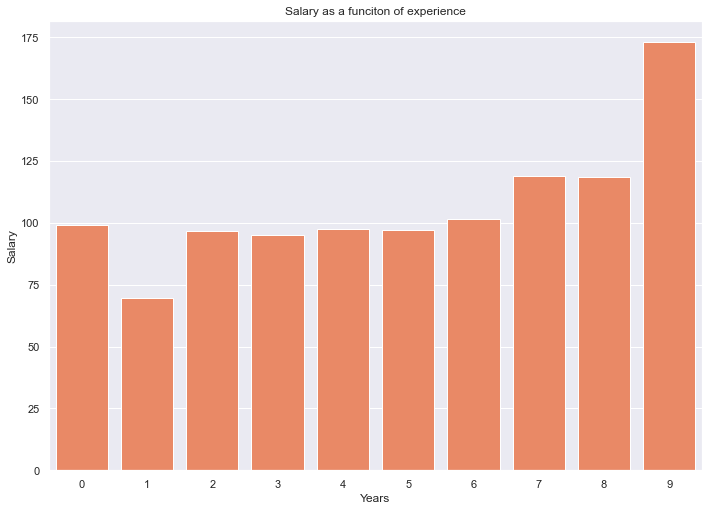

In [65]:
expplot=sns.barplot(x=list(num_dict.keys()),y=newlist,color="coral").set(xlabel="Years",ylabel="Salary",title="Salary as a funciton of experience")


# Predictive model number 2 - concatenated numericals and categoricals and transformed.

In [66]:
x2=main_df.drop('salary_estimate', axis=1)
y2=main_df.salary_estimate

In [67]:
X_train2, X_test2, y_train2, y_test2= train_test_split(x2, y2, test_size=.30,random_state=123)

In [68]:
X_train_const2 = sm.add_constant(X_train2) # adding a constant

model2 = sm.OLS(y_train2, X_train_const2).fit()

X_test_const2 = sm.add_constant(X_test2) # adding a constant
 
print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:        salary_estimate   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     3.836
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.18e-15
Time:                        11:35:02   Log-Likelihood:                -1515.5
No. Observations:                 326   AIC:                             3181.
Df Residuals:                     251   BIC:                             3465.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [70]:
cat_df.headquarters.value_counts()

San Francisco Region    110
Philadelphia Region      79
Boston Region            55
New York Region          51
Chicago Region           42
Atlanta Region           35
Denver Region            17
Seattle Region           16
Other                    14
Dallas Region            13
Kansas City Region       11
United Kingdom           10
Japan                     7
Switzerland               7
Name: headquarters, dtype: int64

In [72]:
main_df.columns= main_df.columns.str.lower()

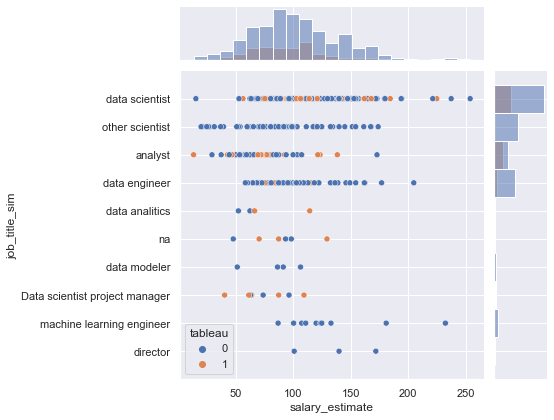

In [74]:
g = sns.JointGrid(data=df, x="salary_estimate", y="job_title_sim", hue="tableau")
g.plot(sns.scatterplot, sns.histplot)

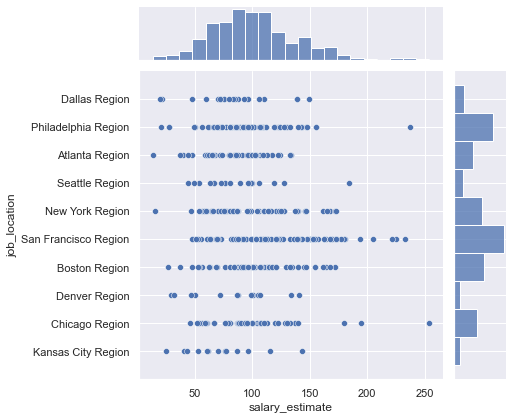

In [75]:
sns.jointplot(x=num_df.salary_estimate,y=cat_df.job_location)


# Now we make a model with the whole main_df, but most of all to make further changes with RFE library

In [77]:
x3_=main_df.drop("salary_estimate", axis=1)
y3_=main_df.salary_estimate

In [78]:
X_train3_, X_test3_, y_train3_, y_test3_ = train_test_split(x3_, y3_, test_size=.30,random_state=42)

In [79]:
X_train_const3_ = sm.add_constant(X_train3_) # adding a constant

model3_ = sm.OLS(y_train3_, X_train_const3_).fit()

X_test_const3_ = sm.add_constant(X_test3_) # adding a constant

print_model3_ = model3_.summary()
print(print_model3_)

                            OLS Regression Results                            
Dep. Variable:        salary_estimate   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     3.648
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.39e-14
Time:                        11:46:12   Log-Likelihood:                -1512.6
No. Observations:                 326   AIC:                             3175.
Df Residuals:                     251   BIC:                             3459.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

#### Now we find the p-values for the regression

In [81]:
pvals=pd.DataFrame(model3_.pvalues)
pvals = pvals.reset_index(level=0)
pvals=pvals.rename(columns={"index":"feat",0:"value"})
pvals

,feat,value
0,const,0.018525
1,rating,0.212128
2,estimated_size,0.276765
3,founded,0.874545
4,revenue,0.062298
...,...,...
70,job_title_sim_na,0.579249
71,job_title_sim_other scientist,0.069015
72,degree_p,0.062346
73,degree_na,0.321681


### aaand find where they are significant

In [82]:
pvals.loc[pvals['value'] < 0.05]

,feat,value
0,const,0.018525
6,spark,0.037372
45,industry_other,0.045753
61,job_location_san francisco region,0.009851
65,job_title_sim_data engineer,0.006305
67,job_title_sim_data scientist,0.000529
68,job_title_sim_director,0.046093
69,job_title_sim_machine learning engineer,0.010412


# Trying to improve model with RFE library (Recursive feature elimination)

In [99]:
x3=main_df.drop("salary_estimate", axis=1)
y3=main_df.salary_estimate

In [100]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=.30,random_state=42)

In [101]:
#For some reason we need to change the train sets from arrays back to dataframes in order to make the function work.
X_train3 = pd.DataFrame(X_train3, columns=x3.columns)
X_test3 = pd.DataFrame(X_test3, columns=x3.columns)

In [102]:
lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 16, step = 1, verbose = 1) # Step is how many features to add or drop for every iteration
selector.fit(X_train3, y_train3)



Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 fe

RFE(estimator=LinearRegression(), n_features_to_select=16, verbose=1)

In [103]:
kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train3.iloc[:,kept_features].columns)


In [104]:
X_train3 = selector.transform(X_train3)
X_test3 = selector.transform(X_test3)

X_train3 = pd.DataFrame(X_train3, columns=kept_features)
X_test3  = pd.DataFrame(X_test3, columns=kept_features)

print("Final selected features: ")
display(X_train3)


Final selected features: 


,headquarters_denver region,headquarters_japan,type_of_ownership_government,industry_architectural & engineering services,industry_education,industry_federal agencies,industry_industrial manufacturing,industry_other,industry_security services,industry_social assistance,job_location_denver region,job_title_sim_data engineer,job_title_sim_data scientist,job_title_sim_director,job_title_sim_machine learning engineer,job_title_sim_other scientist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [106]:
x3=main_df[X_train3.columns]         
y3=main_df.salary_estimate

In [107]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=.30,random_state=123)

In [109]:
X_train_const3 = sm.add_constant(X_train3) # adding a constant

model3 = sm.OLS(y_train3, X_train_const3).fit()

X_test_const3 = sm.add_constant(X_test3) # adding a constant
pred_test=model3.predict(X_test_const3)

print_model3 = model3.summary()
print(print_model3)

                            OLS Regression Results                            
Dep. Variable:        salary_estimate   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     10.05
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           2.28e-20
Time:                        12:10:40   Log-Likelihood:                -1570.5
No. Observations:                 326   AIC:                             3175.
Df Residuals:                     309   BIC:                             3239.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [110]:
result3=pd.DataFrame({"y_test":y_test3,"y_pred":pred_test})
result3

,y_test,y_pred
48,91.0,120.176218
318,110.5,120.176218
85,174.0,91.212535
34,107.0,120.176218
11,85.0,120.176218
...,...,...
170,124.5,120.176218
378,80.0,101.525682
181,181.0,118.481899
172,59.0,70.577759


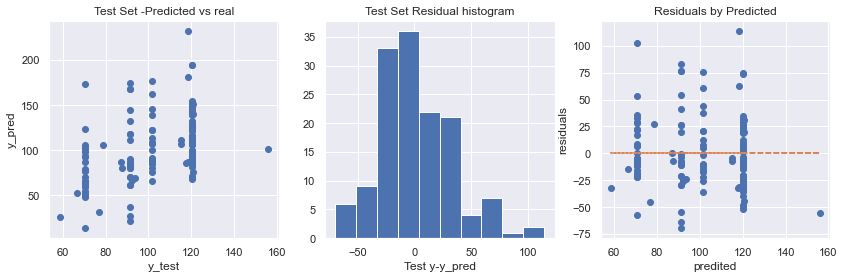

In [113]:

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(pred_test, y_test3, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test3 - pred_test)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(pred_test,y_test3 - pred_test,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(pred_test,np.zeros(len(pred_test)),linestyle='dashed')

In [114]:
print(mse(y_test3,pred_test))
print(mae(y_test3,pred_test))

1109.663045501119
25.929611532798013
